In [4]:
import sunpy.map

In [1]:
from itipy.data.dataset import BaseDataset
from itipy.data.editor import LoadMapEditor, NormalizeRadiusEditor, RemoveOffLimbEditor, MapToDataEditor, NanEditor, \
    NormalizeEditor, ReshapeEditor, AIAPrepEditor

class AIADataset(BaseDataset):
    """
    Dataset for SDO/AIA data

    Args:
        data: Data
        wavelength (int): Wavelength
        resolution (int): Resolution
        ext (str): File extension
        calibration (str): Calibration type
        **kwargs: Additional arguments
    """

    def __init__(self, data, wavelength, resolution=2048, ext='.fits', calibration='auto', **kwargs):

        editors = [LoadMapEditor(),
                   NormalizeRadiusEditor(resolution),
                   AIAPrepEditor(calibration=calibration),
                   MapToDataEditor(),
                   ReshapeEditor((1, resolution, resolution))]
        super().__init__(data, editors=editors, ext=ext, **kwargs)

ImportError: cannot import name 'Iterable' from 'collections' (/home/griffingoodwin/.conda/envs/2025-HL-Flaring-MEGS-AI-Updated/lib/python3.10/collections/__init__.py)

In [20]:
import os
import glob
from sunpy.map import Map
from astropy.io import fits
from astropy.io.fits import Header, PrimaryHDU
import numpy as np
import tqdm as tqdm
import csv

input_folder = '/mnt/data/SDO-AIA/131'
output_folder = '/home/griffingoodwin/2025-HL-Flaring-MEGS-AI'
os.makedirs(output_folder, exist_ok=True)

# 🔎 Collect all .fits files
fits_files = glob.glob(os.path.join(input_folder, '*.fits'))
fits_files = fits_files[:10]



editors = [
    LoadMapEditor(),
    NormalizeRadiusEditor(512),
    AIAPrepEditor(calibration='auto'),
    MapToDataEditor()
]

dataset = BaseDataset(fits_files, editors=editors, ext='.fits', wavelength=131, resolution=512)

In [24]:
for fits_file in tqdm.tqdm(fits_files, desc="Processing FITS files"):

    data, meta = dataset.convertData([fits_file])
    meta_header = meta['header']
    del meta_header['keycomments']
    print(meta_header)
    # Save the processed data as a FITS file
    output_file = os.path.join(output_folder, os.path.basename(fits_file))
    fits.writeto(output_file, data, header=Header(meta_header), overwrite=True)


Processing FITS files:  10%|█         | 1/10 [00:01<00:13,  1.53s/it]

simple: True
bitpix: 16
naxis: 2
naxis1: 512
naxis2: 512
bld_vers: V9R5X
lvl_num: 1.0
t_rec: 2023-07-26T23:40:59Z
trecstep: 1.0
trecepoc: 1977.01.01_00:00:00.000_TAI
trecroun: 1
origin: SDO/JSOC-SDP
date: 2023-08-01T14:14:19Z
telescop: SDO/AIA
instrume: AIA_1
date-obs: 2023-07-26T23:41:06.62Z
t_obs: 2023-07-26T23:41:08.07Z
camera: 1
img_type: LIGHT
exptime: 2.901318
expsdev: 6.5e-05
int_time: 3.15625
wavelnth: 131
waveunit: angstrom
wave_str: 131_THIN
fsn: 280967498
fid: 0
quallev0: 0
quality: 0
totvals: 16777216
datavals: 16777216
missvals: 0
percentd: 100.0
datamin: -8
datamax: 1239
datamedn: 5
datamean: 9.3483
datarms: 17.69
dataskew: 8.9
datakurt: 185.84
datacent: 6.88
datap01: -1.0
datap10: 1.0
datap25: 2.0
datap75: 12.0
datap90: 22.0
datap95: 34.0
datap98: 58.0
datap99: 83.0
nsatpix: 0
oscnmean: None
oscnrms: None
flat_rec: aia.flatfield[:#602]
nspikes: 3174
ctype1: HPLN-TAN
cunit1: arcsec
crval1: 0.0
cdelt1: 4.0604872171875
crpix1: 256.5
ctype2: HPLT-TAN
cunit2: arcsec
crval2: 0

Processing FITS files:  20%|██        | 2/10 [00:03<00:12,  1.53s/it]

simple: True
bitpix: 16
naxis: 2
naxis1: 512
naxis2: 512
bld_vers: V9R5X
lvl_num: 1.0
t_rec: 2023-07-28T01:59:59Z
trecstep: 1.0
trecepoc: 1977.01.01_00:00:00.000_TAI
trecroun: 1
origin: SDO/JSOC-SDP
date: 2023-08-03T14:06:24Z
telescop: SDO/AIA
instrume: AIA_1
date-obs: 2023-07-28T02:00:06.62Z
t_obs: 2023-07-28T02:00:08.07Z
camera: 1
img_type: LIGHT
exptime: 2.900755
expsdev: 3.7e-05
int_time: 3.15625
wavelnth: 131
waveunit: angstrom
wave_str: 131_THIN
fsn: 281030582
fid: 0
quallev0: 0
quality: 0
totvals: 16777216
datavals: 16777216
missvals: 0
percentd: 100.0
datamin: -8
datamax: 4030
datamedn: 5
datamean: 9.7922
datarms: 28.23
dataskew: 35.87
datakurt: 2375.83
datacent: 6.41
datap01: -1.0
datap10: 1.0
datap25: 2.0
datap75: 12.0
datap90: 22.0
datap95: 35.0
datap98: 62.0
datap99: 90.0
nsatpix: 0
oscnmean: None
oscnrms: None
flat_rec: aia.flatfield[:#602]
nspikes: 4051
ctype1: HPLN-TAN
cunit1: arcsec
crval1: 0.0
cdelt1: 4.060289539453126
crpix1: 256.5
ctype2: HPLT-TAN
cunit2: arcsec
crva

Processing FITS files:  30%|███       | 3/10 [00:04<00:10,  1.53s/it]

simple: True
bitpix: 16
naxis: 2
naxis1: 512
naxis2: 512
bld_vers: V9R5X
lvl_num: 1.0
t_rec: 2023-08-01T17:12:59Z
trecstep: 1.0
trecepoc: 1977.01.01_00:00:00.000_TAI
trecroun: 1
origin: SDO/JSOC-SDP
date: 2023-08-07T14:45:17Z
telescop: SDO/AIA
instrume: AIA_1
date-obs: 2023-08-01T17:13:06.62Z
t_obs: 2023-08-01T17:13:08.07Z
camera: 1
img_type: LIGHT
exptime: 2.901316
expsdev: 7.1e-05
int_time: 3.15625
wavelnth: 131
waveunit: angstrom
wave_str: 131_THIN
fsn: 281297122
fid: 0
quallev0: 0
quality: 0
totvals: 16777216
datavals: 16777216
missvals: 0
percentd: 100.0
datamin: -8
datamax: 2262
datamedn: 5
datamean: 9.1806
datarms: 16.56
dataskew: 8.11
datakurt: 226.01
datacent: 9.32
datap01: -1.0
datap10: 1.0
datap25: 2.0
datap75: 12.0
datap90: 22.0
datap95: 33.0
datap98: 56.0
datap99: 78.0
nsatpix: 0
oscnmean: None
oscnrms: None
flat_rec: aia.flatfield[:#602]
nspikes: 37898
ctype1: HPLN-TAN
cunit1: arcsec
crval1: 0.0
cdelt1: 4.063647048828126
crpix1: 256.5
ctype2: HPLT-TAN
cunit2: arcsec
crval

Processing FITS files:  40%|████      | 4/10 [00:06<00:09,  1.53s/it]

simple: True
bitpix: 16
naxis: 2
naxis1: 512
naxis2: 512
bld_vers: V9R5X
lvl_num: 1.0
t_rec: 2023-07-12T05:14:59Z
trecstep: 1.0
trecepoc: 1977.01.01_00:00:00.000_TAI
trecroun: 1
origin: SDO/JSOC-SDP
date: 2023-07-18T14:07:30Z
telescop: SDO/AIA
instrume: AIA_1
date-obs: 2023-07-12T05:15:06.62Z
t_obs: 2023-07-12T05:15:08.07Z
camera: 1
img_type: LIGHT
exptime: 2.900806
expsdev: 3.9e-05
int_time: 3.15625
wavelnth: 131
waveunit: angstrom
wave_str: 131_THIN
fsn: 280128708
fid: 0
quallev0: 0
quality: 0
totvals: 16777216
datavals: 16777216
missvals: 0
percentd: 100.0
datamin: -8
datamax: 16375
datamedn: 5
datamean: 10.7291
datarms: 85.54
dataskew: 137.34
datakurt: 24573.13
datacent: 8.07
datap01: -1.0
datap10: 1.0
datap25: 2.0
datap75: 11.0
datap90: 21.0
datap95: 34.0
datap98: 63.0
datap99: 101.0
nsatpix: 293
oscnmean: None
oscnrms: None
flat_rec: aia.flatfield[:#602]
nspikes: 12241
ctype1: HPLN-TAN
cunit1: arcsec
crval1: 0.0
cdelt1: 4.055179867578126
crpix1: 256.5
ctype2: HPLT-TAN
cunit2: arc

Processing FITS files:  50%|█████     | 5/10 [00:07<00:07,  1.53s/it]

simple: True
bitpix: 16
naxis: 2
naxis1: 512
naxis2: 512
bld_vers: V9R5X
lvl_num: 1.0
t_rec: 2023-08-07T00:48:59Z
trecstep: 1.0
trecepoc: 1977.01.01_00:00:00.000_TAI
trecroun: 1
origin: SDO/JSOC-SDP
date: 2023-08-13T14:05:30Z
telescop: SDO/AIA
instrume: AIA_1
date-obs: 2023-08-07T00:49:06.62Z
t_obs: 2023-08-07T00:49:08.07Z
camera: 1
img_type: LIGHT
exptime: 2.900785
expsdev: 3.9e-05
int_time: 3.15625
wavelnth: 131
waveunit: angstrom
wave_str: 131_THIN
fsn: 281600982
fid: 0
quallev0: 0
quality: 0
totvals: 16777216
datavals: 16777216
missvals: 0
percentd: 100.0
datamin: -8
datamax: 499
datamedn: 5
datamean: 9.1506
datarms: 14.96
dataskew: 4.94
datakurt: 43.61
datacent: 6.53
datap01: -1.0
datap10: 1.0
datap25: 2.0
datap75: 12.0
datap90: 23.0
datap95: 35.0
datap98: 54.0
datap99: 74.0
nsatpix: 0
oscnmean: None
oscnrms: None
flat_rec: aia.flatfield[:#602]
nspikes: 3355
ctype1: HPLN-TAN
cunit1: arcsec
crval1: 0.0
cdelt1: 4.0655892792968755
crpix1: 256.5
ctype2: HPLT-TAN
cunit2: arcsec
crval2:

Processing FITS files:  60%|██████    | 6/10 [00:09<00:06,  1.52s/it]

simple: True
bitpix: 16
naxis: 2
naxis1: 512
naxis2: 512
bld_vers: V9R5X
lvl_num: 1.0
t_rec: 2023-08-06T19:00:59Z
trecstep: 1.0
trecepoc: 1977.01.01_00:00:00.000_TAI
trecroun: 1
origin: SDO/JSOC-SDP
date: 2023-08-12T14:13:46Z
telescop: SDO/AIA
instrume: AIA_1
date-obs: 2023-08-06T19:01:06.63Z
t_obs: 2023-08-06T19:01:08.08Z
camera: 1
img_type: LIGHT
exptime: 2.900794
expsdev: 3.9e-05
int_time: 3.15625
wavelnth: 131
waveunit: angstrom
wave_str: 131_THIN
fsn: 281587062
fid: 0
quallev0: 0
quality: 0
totvals: 16777216
datavals: 16777216
missvals: 0
percentd: 100.0
datamin: -8
datamax: 16375
datamedn: 5
datamean: 11.6098
datarms: 130.59
dataskew: 84.66
datakurt: 8580.6
datacent: 7.48
datap01: -1.0
datap10: 1.0
datap25: 2.0
datap75: 12.0
datap90: 23.0
datap95: 35.0
datap98: 56.0
datap99: 78.0
nsatpix: 362
oscnmean: None
oscnrms: None
flat_rec: aia.flatfield[:#602]
nspikes: 12241
ctype1: HPLN-TAN
cunit1: arcsec
crval1: 0.0
cdelt1: 4.066487747265626
crpix1: 256.5
ctype2: HPLT-TAN
cunit2: arcsec

Processing FITS files:  70%|███████   | 7/10 [00:10<00:04,  1.52s/it]

simple: True
bitpix: 16
naxis: 2
naxis1: 512
naxis2: 512
bld_vers: V9R5X
lvl_num: 1.0
t_rec: 2023-07-31T14:55:59Z
trecstep: 1.0
trecepoc: 1977.01.01_00:00:00.000_TAI
trecroun: 1
origin: SDO/JSOC-SDP
date: 2023-08-06T14:31:40Z
telescop: SDO/AIA
instrume: AIA_1
date-obs: 2023-07-31T14:56:06.62Z
t_obs: 2023-07-31T14:56:08.07Z
camera: 1
img_type: LIGHT
exptime: 2.900808
expsdev: 4e-05
int_time: 3.15625
wavelnth: 131
waveunit: angstrom
wave_str: 131_THIN
fsn: 281234118
fid: 0
quallev0: 0
quality: 0
totvals: 16777216
datavals: 16777216
missvals: 0
percentd: 100.0
datamin: -8
datamax: 727
datamedn: 5
datamean: 9.2116
datarms: 16.43
dataskew: 5.9
datakurt: 61.08
datacent: 8.95
datap01: -1.0
datap10: 1.0
datap25: 2.0
datap75: 12.0
datap90: 22.0
datap95: 34.0
datap98: 57.0
datap99: 82.0
nsatpix: 0
oscnmean: None
oscnrms: None
flat_rec: aia.flatfield[:#602]
nspikes: 91950
ctype1: HPLN-TAN
cunit1: arcsec
crval1: 0.0
cdelt1: 4.062610178515625
crpix1: 256.5
ctype2: HPLT-TAN
cunit2: arcsec
crval2: 0.

Processing FITS files:  80%|████████  | 8/10 [00:12<00:03,  1.52s/it]

simple: True
bitpix: 16
naxis: 2
naxis1: 512
naxis2: 512
bld_vers: V9R5X
lvl_num: 1.0
t_rec: 2023-07-20T10:05:59Z
trecstep: 1.0
trecepoc: 1977.01.01_00:00:00.000_TAI
trecroun: 1
origin: SDO/JSOC-SDP
date: 2023-07-26T14:11:13Z
telescop: SDO/AIA
instrume: AIA_1
date-obs: 2023-07-20T10:06:06.62Z
t_obs: 2023-07-20T10:06:08.07Z
camera: 1
img_type: LIGHT
exptime: 2.900794
expsdev: 3.9e-05
int_time: 3.15625
wavelnth: 131
waveunit: angstrom
wave_str: 131_THIN
fsn: 280590584
fid: 0
quallev0: 0
quality: 0
totvals: 16777216
datavals: 16777216
missvals: 0
percentd: 100.0
datamin: -8
datamax: 1224
datamedn: 5
datamean: 9.0192
datarms: 15.02
dataskew: 6.4
datakurt: 101.27
datacent: 12.49
datap01: -1.0
datap10: 1.0
datap25: 2.0
datap75: 12.0
datap90: 22.0
datap95: 33.0
datap98: 52.0
datap99: 71.0
nsatpix: 0
oscnmean: None
oscnrms: None
flat_rec: aia.flatfield[:#602]
nspikes: 18215
ctype1: HPLN-TAN
cunit1: arcsec
crval1: 0.0
cdelt1: 4.0567915351562505
crpix1: 256.5
ctype2: HPLT-TAN
cunit2: arcsec
crva

Processing FITS files:  90%|█████████ | 9/10 [00:13<00:01,  1.52s/it]

simple: True
bitpix: 16
naxis: 2
naxis1: 512
naxis2: 512
bld_vers: V9R5X
lvl_num: 1.0
t_rec: 2023-08-07T12:23:59Z
trecstep: 1.0
trecepoc: 1977.01.01_00:00:00.000_TAI
trecroun: 1
origin: SDO/JSOC-SDP
date: 2023-08-13T14:11:05Z
telescop: SDO/AIA
instrume: AIA_1
date-obs: 2023-08-07T12:24:06.62Z
t_obs: 2023-08-07T12:24:08.07Z
camera: 1
img_type: LIGHT
exptime: 2.901336
expsdev: 6.6e-05
int_time: 3.15625
wavelnth: 131
waveunit: angstrom
wave_str: 131_THIN
fsn: 281628706
fid: 0
quallev0: 0
quality: 0
totvals: 16777216
datavals: 16777216
missvals: 0
percentd: 100.0
datamin: -8
datamax: 1309
datamedn: 5
datamean: 8.9802
datarms: 15.57
dataskew: 6.92
datakurt: 135.28
datacent: 5.7
datap01: -1.0
datap10: 1.0
datap25: 2.0
datap75: 12.0
datap90: 22.0
datap95: 34.0
datap98: 55.0
datap99: 75.0
nsatpix: 0
oscnmean: None
oscnrms: None
flat_rec: aia.flatfield[:#602]
nspikes: 27101
ctype1: HPLN-TAN
cunit1: arcsec
crval1: 0.0
cdelt1: 4.065558053906251
crpix1: 256.5
ctype2: HPLT-TAN
cunit2: arcsec
crval2

Processing FITS files: 100%|██████████| 10/10 [00:15<00:00,  1.52s/it]

simple: True
bitpix: 16
naxis: 2
naxis1: 512
naxis2: 512
bld_vers: V9R5X
lvl_num: 1.0
t_rec: 2023-07-09T03:43:59Z
trecstep: 1.0
trecepoc: 1977.01.01_00:00:00.000_TAI
trecroun: 1
origin: SDO/JSOC-SDP
date: 2023-07-15T14:19:27Z
telescop: SDO/AIA
instrume: AIA_1
date-obs: 2023-07-09T03:44:06.62Z
t_obs: 2023-07-09T03:44:08.07Z
camera: 1
img_type: LIGHT
exptime: 2.901328
expsdev: 7.2e-05
int_time: 3.15625
wavelnth: 131
waveunit: angstrom
wave_str: 131_THIN
fsn: 279952268
fid: 0
quallev0: 0
quality: 0
totvals: 16777216
datavals: 16777216
missvals: 0
percentd: 100.0
datamin: -8
datamax: 654
datamedn: 4
datamean: 8.3041
datarms: 14.25
dataskew: 5.69
datakurt: 59.38
datacent: 6.99
datap01: -1.0
datap10: 1.0
datap25: 2.0
datap75: 11.0
datap90: 20.0
datap95: 30.0
datap98: 51.0
datap99: 72.0
nsatpix: 0
oscnmean: None
oscnrms: None
flat_rec: aia.flatfield[:#602]
nspikes: 3179
ctype1: HPLN-TAN
cunit1: arcsec
crval1: 0.0
cdelt1: 4.0553043265625
crpix1: 256.5
ctype2: HPLT-TAN
cunit2: arcsec
crval2: 0.

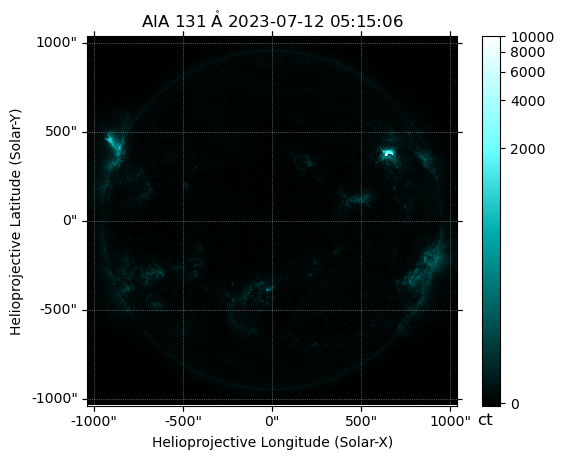

In [25]:
sunpy.map.Map('/home/griffingoodwin/2025-HL-Flaring-MEGS-AI/2023-07-12T05:15:00.fits').peek()